In [1]:
import numpy as np
import pandas as pd

In [2]:
#importing dataset
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

c:\Users\SUNIL\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Understanding the data

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### Observation:
1. DESCR key describing the dataset 
2. data key containing an array with one row per instance and column per feature
3. target key containing an array with the labels

In [5]:
# Taking necessary part
X, y = mnist['data'], mnist['target']

In [6]:
#Checking if both have same no of rows?
X.shape

(70000, 784)

In [7]:
y.shape

#Yes both have 70000 rows

(70000,)

### Observation:
1. There are 70000 images with 784 features
2. because each image has 28 X 28 pixels

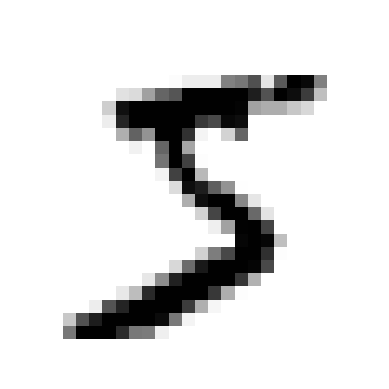

In [8]:
# let's take a look at a single image
import matplotlib.pyplot as plt
%matplotlib inline

some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary', interpolation='nearest')
plt.axis('off')
plt.show()

In [9]:
#Looks like 5, let's check the label
y[0]

'5'

In [10]:
#label is a string
y = y.astype(np.uint8)

### Observation:
1. dataset need to be separated into training and test dataset 
2. but mnist dataset is already separated
3. first 60000 rows are training data and then test data
4. training set is already shuffled 

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training Binary Classifier
for example- '5 detector'

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### Stochastic Gradient Descent Classifier(SGD)
1. can handle large datasets efficiently
2. deals with training instances independently one at a time(well suited for online learning)

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict([some_digit])

c:\Users\SUNIL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

### Performance Measures:
1. Measuring Accuracy Using Cross-Validation

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,  shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.to_numpy()[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.to_numpy()[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

#### Observation:
1. Above 95% accuracy

In [17]:

from sklearn.base import BaseEstimator

class Never5classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [18]:
never_5_clf = Never5classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

#### Observation:
1. Above 90% accuracy
2. because only 10% images are 5s
3. thus accuracy measure is not preferred for classifiers, especially for skewed datasets

### Confusion Matrix

In [21]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

### Observation:
1. Each row represents actual class and column represents predicted class
2. The first row of this matrix considers non-5 images (the nega‐
tive class):
    1. 53892 were correctly classified as non-5s(called true negatives)
    2. while 687 were wrongly classified as 5s(called false positives)
    
3. The second row considers the images of 5s (the positive class):
    1. 1831 were wrongly classified as non-5s(called false negatives)
    2. while 3530 were correctly classified as 5s(called true positives)

In [24]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

#### Precision:

        precision = TP / TP + FP

#### Recall:

        recall = TP / TP + FN

In [29]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)


0.8370879772350012

In [28]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

### Observation:
1. Our 5-detector predictions is 83.7% correct
2. But, it detects only 65.1% of 5s

#### thus arrives F1 score:
1. harmonic mean of precision and recall
2. harmonic mean gives much weight to low values
3. thus if both recall and precision are high, gives a high F1 score

        F1 = 2 / (1 / precision) + (1 / recall) or
        = 2 X precision X recall / (precision + recall)
        = TP / (TP + (FN + FP) / 2)

In [30]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Precision / Recall Tradeoff

In [32]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores


c:\Users\SUNIL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [34]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [35]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [36]:
# decision scores of all instances
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [37]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

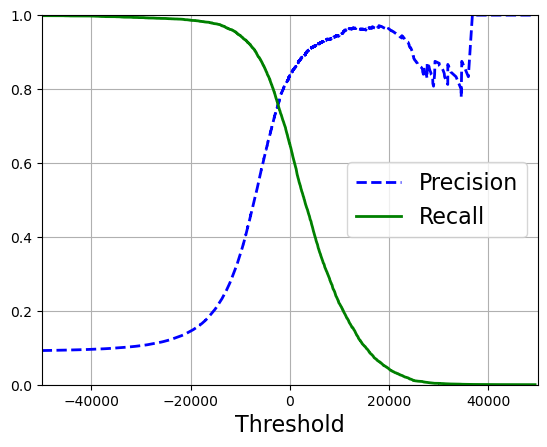

In [49]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

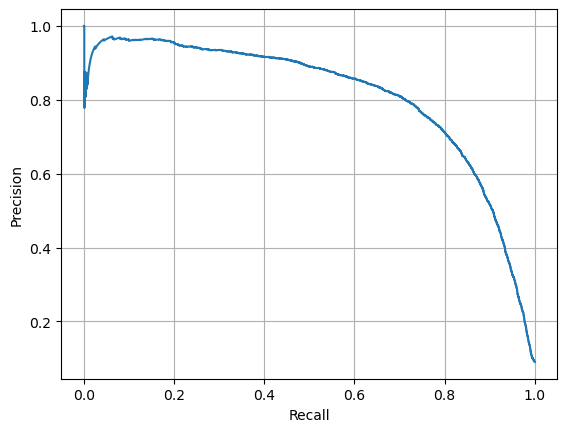

In [59]:
plt.plot(recalls[:-1], precisions[:-1])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

In [63]:
# gives the lowest threshold that gives you atleast 90% precision

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [65]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [66]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [67]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

### Observation:
1. we can easily get high precision by setting threshold high
2. but it's not very useful if its recall is too low!

#### Note: 
If someone says “let’s reach 99% precision,” you should ask, “at
what recall?”

### The ROC curve:
1. plots true positive rate(recall) against false positive rate(FPR)
2. FPR = 1 - True Negative Rate(TNR also known as senstivity)
3. thus ROC is sensitivity(recall) vs 1 - specificity

In [68]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

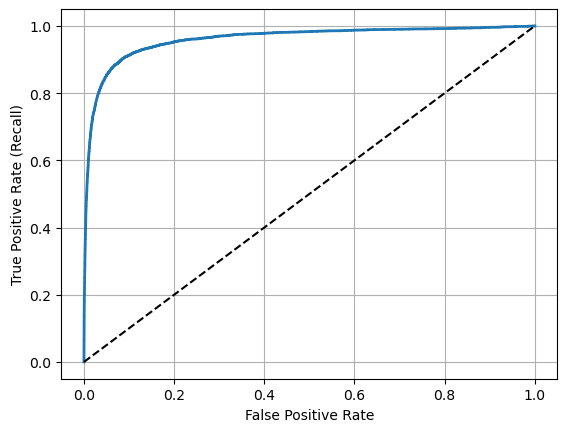

In [72]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis()
    plt.grid(True)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [73]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

### RandomForest Classifier
1. does not have a decision_function() method. Instead it has a pre
dict_proba() method
2. The predict_proba() method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class (e.g., 70% chance that the image represents a 5):

In [75]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3 , method='predict_proba')

##### Problem:

To plot roc_curve need scores not probabilities

In [77]:
# Solution: Use the positive class's probabilities as score

y_scores_forest = y_probas_forest[: , 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

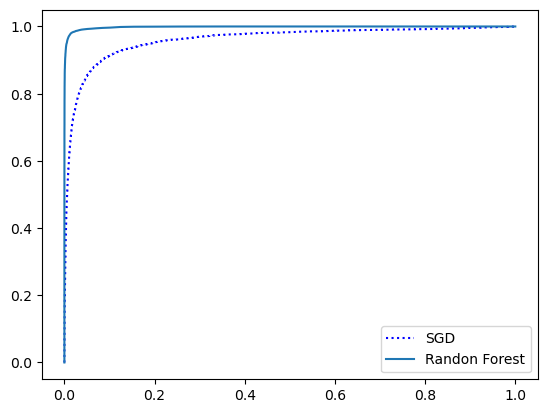

In [81]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plt.plot(fpr_forest, tpr_forest, label='Randon Forest')
plt.legend(loc='lower right')
plt.show()

In [86]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [90]:
precision_score(y_train_5, (y_scores_forest >= 0.5).astype(int))

0.9897468089558485

In [91]:
recall_score(y_train_5, (y_scores_forest >= 0.5).astype(int))

0.8725327430363402

### Observation:
1. RandomForestClassifier's ROC curve looks much better then SGDClassifier's
2. 99% precision and 87% recall with RandomForestClassifier, much better than SGDClassifier's

## Multiclass Classifier (or multinomial Classifier)
1. can distinguish between more than two classes
2. Algos like Random Forest classifiers or naive Bayes classifiers are
capable of handling multiple classes directly.
3. Others (such as Support Vector Machine
classifiers or Linear classifiers) are strictly binary classifiers.
4. there are various strategies that you can use to perform multiclass classification using multiple binary classifiers.

### multiple binary classifiers
1. OvA and OvO strategy are used, OvA for few classifiers and large training set while OvO for more classifiers with less training set.
2. scikit automatically detects and runs OvA (except for SVM classifiers for
which it uses OvO)

In [92]:
#fit
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

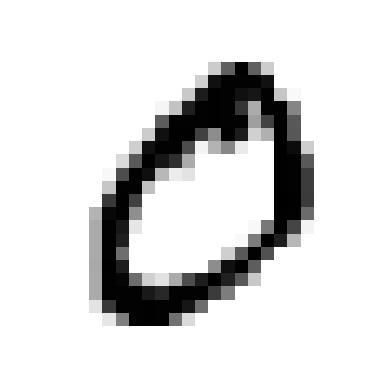

In [99]:
# let's take a look at a single image
import matplotlib.pyplot as plt
%matplotlib inline

some_digit = X.iloc[1]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary', interpolation='nearest')
plt.axis('off')
plt.show()

In [100]:
#predict
sgd_clf.predict([some_digit])

c:\Users\SUNIL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)

### Observation:
1. scikit seldom selects the best classifier based on highest score
2. Under the hood, it goes under 10 binary classifiers

In [101]:
#To see scores per instance
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

c:\Users\SUNIL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[ 14390.59839396, -36919.31719967,  -9811.47434817,
         -8054.56345089, -21825.25725463, -11313.62371972,
        -23649.39025808, -15986.78463914,  -3798.52944589,
        -10635.46503726]])

In [102]:
np.argmax(some_digit_scores)

0

### Observation:
1. highest score is for digit-0

In [103]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [104]:
sgd_clf.classes_[0]

0

### OvO Strategy

In [105]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

c:\Users\SUNIL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)

In [107]:
len(ovo_clf.estimators_)
#   (N X (N-1)) / 2

45

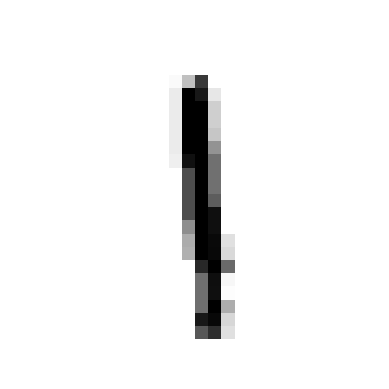

In [110]:
# let's take a look at a single image
import matplotlib.pyplot as plt
%matplotlib inline

some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary', interpolation='nearest')
plt.axis('off')
plt.show()

In [111]:
# RandomForestClassifier is just as easy:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

c:\Users\SUNIL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=uint8)

In [112]:
# RandomForest Classifier doesn't need OvO or OvA Strategy,
# they use predict_proba to get the list of probabilities
forest_clf.predict_proba([some_digit])

c:\Users\SUNIL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Observation:
1. Random Forest performs much better
2. for 0 & 1- it gave 100% probability for both digits

#### Accuracy:
1. SGDClassifier'

In [113]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

### Observation:
1. SGDClassifier gives over 86% accuracy
2. However, to improve we used scaling, and found 89% accuracy

## Error analysis:
asuming we found promising model and want to find ways to improve it

In [116]:
# predictions using cross_val_pred
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx 

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

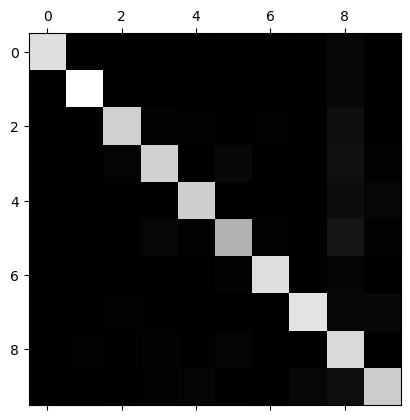

In [117]:
# Visualization of confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

### Observation:
1. most images are on the main diagonal, which means they were classified correctly
2. 5s look slightly darker which could mean that there are fewer images of 5s in the dataset or that the classifier does not perform as well on 5s as on other digits.

In [118]:
#To find errors, have to divide each value by number of images in the confusion matrix
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

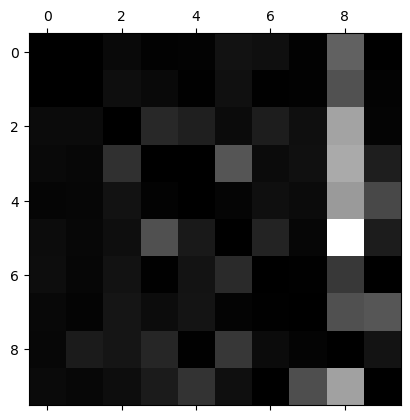

In [119]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

### Observation:
1. rows- actual classes while columns- predicted
2. this shows model is confusing 8 for almost every actual class
3. 5 is misclassified as 3 and vice versa
4. 7 is also misclassified as 9

#### Solution:
1. gather more training data for digits that
look like 8s (but are not) so the classifier can learn to distinguish them from real 8s
2. engineer new features that would help the classifier—for example, writ‐
ing an algorithm to count the number of closed loops (e.g., 8 has two, 6 has one, 5 has
none).
3. could preprocess the images (e.g., using Scikit-Image, Pillow, or
OpenCV) to make some patterns stand out more, such as closed loops.

but, solving individual errors can be a good way but its difficult and time-consuming.

In [123]:
import matplotlib.pyplot as plt

def plot_digits(images, images_per_row=10, **options):
    """
    Plot a set of images of digits.
    
    Parameters:
    - images: array-like, shape (n_images, n_pixels)
        An array of images, where each row represents a flattened image of a digit.
    - images_per_row: int, optional (default=10)
        Number of images to display per row.
    - **options: dict, optional
        Additional keyword arguments to be passed to `imshow`.
    """
    # Calculate the number of rows needed to display all images
    n_images = len(images)
    n_rows = (n_images - 1) // images_per_row + 1
    
    # Create subplots
    fig, axes = plt.subplots(n_rows, images_per_row, figsize=(images_per_row, n_rows))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    
    # Plot each image
    for i, ax in enumerate(axes.flat):
        if i < n_images:
            ax.imshow(images[i].reshape(28, 28), cmap='binary', **options)
            ax.axis('off')
    plt.show()


In [127]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## Multilabel Classification
that gives multiple classes for each instance

### KNeighborsClassifier
it supports multilabel classification but not all models do

In [130]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [131]:
knn_clf.predict([some_digit])

c:\Users\SUNIL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

### Evaluation of Model

In [134]:
# assuming all labels have same weight
y_train_knn_pred = cross_val_predict(knn_clf, np.array(X_train), y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

In [135]:
# assuming all labels have different weight
y_train_knn_pred = cross_val_predict(knn_clf, np.array(X_train), y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='weighted')

0.9778357403921755

## Multioutput Classification
labels can have multiclass(i.e. it can have more than two values)

The line between classification and regression is sometimes blurry,
such as in this example. Arguably, predicting pixel intensity is more
akin to regression than to classification. Moreover, multioutput
systems are not limited to classification tasks; you could even have
a system that outputs multiple labels per instance, including both
class labels and value labels

In [137]:
# adding noise to the original data
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

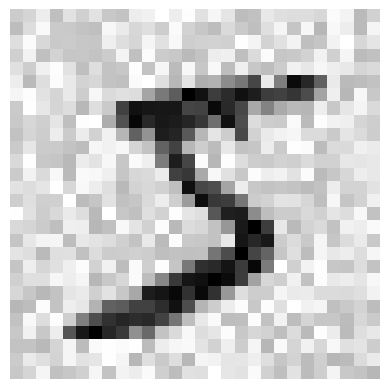

In [141]:
# let's take a look at a single image
import matplotlib.pyplot as plt
%matplotlib inline

some_digit = X_train_mod.iloc[0]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary', interpolation='nearest')
plt.axis('off')
plt.show()

In [143]:
import matplotlib.pyplot as plt

def plot_digit(digit):
    """
    Plot a single digit image.
    
    Parameters:
    - digit: array-like, shape (784,)
        An array representing the pixel values of a digit image.
    """
    plt.imshow(digit.reshape(28, 28), cmap='binary')
    plt.axis('off')
    plt.show()


c:\Users\SUNIL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


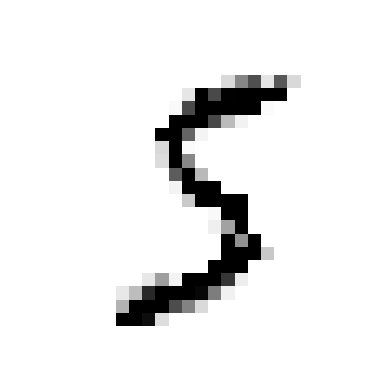

In [144]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([some_digit])
plot_digit(clean_digit)